# II. EDA and Null Model
---

In this section, I process the images and do a quick exploratory analysis to load some of the images. Also, I run the null model as a baseline to compare to the CNN model and Transfer Model performance.

In [23]:
# Imports.
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from IPython.display import Image
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize

# For reproducability.
np.random.seed(42)
from numpy.random import seed
seed(42)

In [12]:
# Mount G-Drive FOLDER.
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [13]:
# Check data folder.
!ls /content/drive/MyDrive/Capstone/images

anything_but  bear_scat


---
### Split data set into training and validation sets.

Check how many images will be working with for each class. Go through data folder and classify them based on folder location (since "anything_but" is first it will be label as 0 and images in "bear_scat" folder will be labelled as 1).


In [24]:
# Create train_ds and val_ds for model.

train_df = image_dataset_from_directory(
    '/content/drive/MyDrive/Capstone/images', # Directory.
    image_size = (256, 256), # Sizes images to be same size.
    batch_size = 32, # Only load 32 images at a time, as memory can't hold them all.
    seed = 42, # Random seed for reproducibility.
    validation_split = 0.2, 
    subset = 'training',
    label_mode = 'binary' # Label is binary since we have two classes.
)

val_ds = image_dataset_from_directory(
    '/content/drive/MyDrive/Capstone/images',
    image_size = (256, 256),
    batch_size = 32,
    seed = 42,
    validation_split = 0.2,
    subset = 'validation',
    label_mode = 'binary'
)

Found 1046 files belonging to 2 classes.
Using 837 files for training.
Found 1046 files belonging to 2 classes.
Using 209 files for validation.


---
### Calculate Null Model Performance

In [15]:
# Calculate null model
print(f'Bear Scat is {round(524/1046, 2)* 100}%')
print(f'Not Bear Scat is {round(524/1046, 2)* 100}%')

Bear Scat is 50.0%
Not Bear Scat is 50.0%


This tells us that if we were to classify the image every time as "bear scat", since the classes are evenly balanced, we would have a 50% chance of correctly classifying it as bear poop. That is, the null model has an accuracy of 50%.

---
### EDA

Visualize the labelled classes.

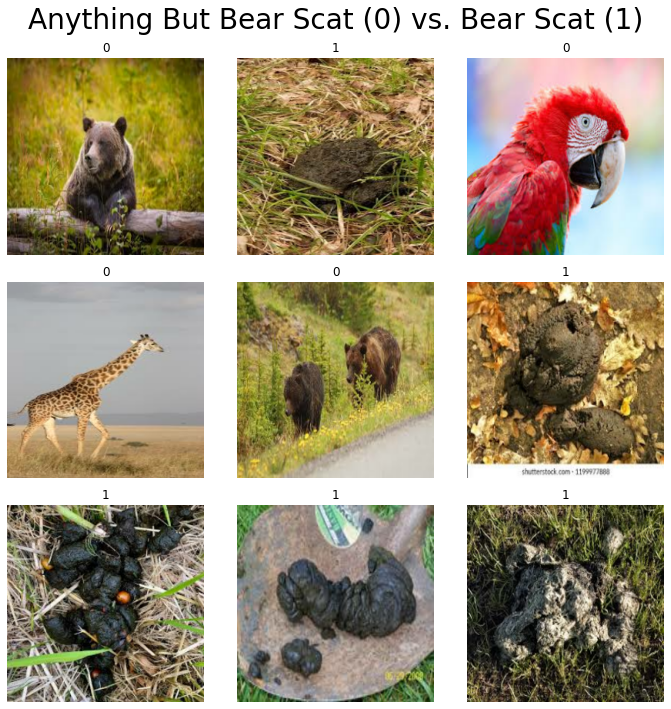

In [22]:
# Performing EDA on classes
plt.figure(figsize=(10, 10))
for images, labels in train_df.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
plt.tight_layout()
plt.suptitle('Anything But Bear Scat (0) vs. Bear Scat (1)', fontsize = 28) 
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Capstone/figures/bearpoo_vs_not' )

---
## Next Steps



Now that we have checked out how the images will be classified and the performance of our null model, we can get into modelling using CNNs in the next section.

---